In [22]:
from driving.simple_env import *
import math

In [2]:
def policy(s):
    d = s[0]
    theta = s[1]
    return -30*d -0.5*theta

In [33]:
env = SimpleDrivingEnv()

reward: -0.09445045529176965


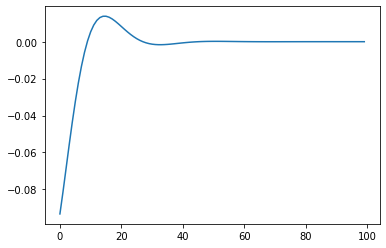

In [4]:
plot_sim(env, policy)

In [5]:
from stable_baselines.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines import DQN

def env_constructor():
    return SimpleDrivingEnv()

env = DummyVecEnv([lambda: env_constructor()])  # The algorithms require a vectorized environment to run

model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

W0813 11:21:20.017900 140003204597568 deprecation_wrapper.py:119] From /home/robbizorg/anaconda3/lib/python3.6/site-packages/stable_baselines/common/tf_util.py:98: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0813 11:21:20.023282 140003204597568 deprecation_wrapper.py:119] From /home/robbizorg/anaconda3/lib/python3.6/site-packages/stable_baselines/common/tf_util.py:107: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0813 11:21:20.086621 140003204597568 deprecation_wrapper.py:119] From /home/robbizorg/anaconda3/lib/python3.6/site-packages/stable_baselines/deepq/dqn.py:123: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0813 11:21:20.088983 140003204597568 deprecation_wrapper.py:119] From /home/robbizorg/anaconda3/lib/python3.6/site-packages/stable_baselines/deepq/build_graph.py:358: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -19.7    |
| steps                   | 3718     |
--------------------------------------


In [60]:
model.learn(total_timesteps=10000) # more learning

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -1.9     |
| steps                   | 9896     |
--------------------------------------


In [59]:
model.step_model.step([[1,0],])

(array([0]),
 array([[-0.82529134, -0.9012687 , -0.9610582 , -1.0292583 , -1.1652963 ]],
       dtype=float32),
 None)

In [52]:
# Example Policy that students should write using the step model from stable-baselines.DQN
def cutePolicy(s):
    d = s[0]
    theta = s[1]
    
    best_a = 0
    best_q = -math.inf
    estimates = model.step_model.step([[d,theta],])[1][0]
#     print(estimates)
    for i in range(0, 5):
        if estimates[i] > best_q:
            best_q = estimates[i]
            best_a = i
            
    return env.actions[best_a]
        

reward: -1.095636553429323


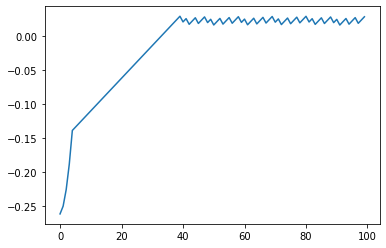

In [75]:
plot_sim(env, cutePolicy)